<a href="https://colab.research.google.com/github/VasaBhanuPrakash/Mobile-Sales-Prediction/blob/main/Mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
df=pd.read_csv("mobile phone price prediction.csv")

In [ ]:
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [ ]:
df.tail()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
1365,1365,TCL 40R,4.05,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Memory Card (Hybrid),12,"18,999",TCL,64 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 700 5G
1366,1366,TCL 50 XL NxtPaper 5G,4.10,80,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.8 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,Memory Card (Hybrid),14,"24,990",TCL,128 GB inbuilt,33W Fast Charging,1200 x 2400 px,Octa Core,Dimensity 7050
1367,1367,TCL 50 XE NxtPaper 5G,4.00,80,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"23,990",TCL,256 GB inbuilt,18W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6080
1368,1368,TCL 40 NxtPaper 5G,4.50,79,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 1 TB",13,"22,499",TCL,256 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6020
1369,1369,TCL Trifold,4.65,93,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,4600 mAh Battery,10 inches,"Foldable Display, Dual Display",50 MP + 48 MP + 8 MP Triple Rear &amp; 32 MP F...,13,"1,19,990",TCL,256 GB inbuilt,67W Fast Charging,1916 x 2160 px,Octa Core,Snapdragon 8 Gen2


In [ ]:
df.dtypes

Unnamed: 0             int64
Name                  object
Rating               float64
Spec_score             int64
No_of_sim             object
Ram                   object
Battery               object
Display               object
Camera                object
External_Memory       object
Android_version       object
Price                 object
company               object
Inbuilt_memory        object
fast_charging         object
Screen_resolution     object
Processor             object
Processor_name        object
dtype: object

In [ ]:
df.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [ ]:
df.isna().sum()

Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

In [ ]:
df.shape

(1370, 18)

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(817, 18)

In [ ]:
df.isna().sum()

Unnamed: 0           0
Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64

<Axes: >

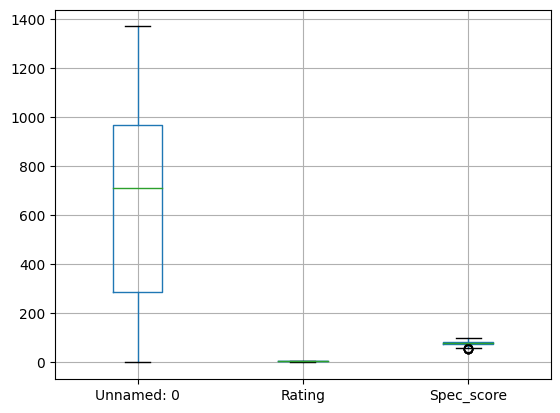

In [ ]:
df.boxplot()

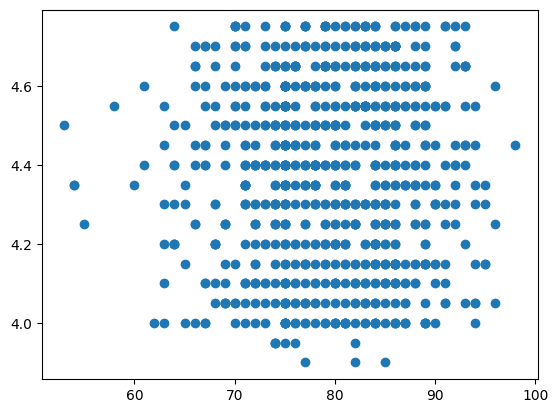

In [ ]:
plt.scatter(df.Spec_score,df.Rating)

(array([  4.,   4.,  29.,  53., 178., 132., 200., 129.,  72.,  16.]),
 array([53. , 57.5, 62. , 66.5, 71. , 75.5, 80. , 84.5, 89. , 93.5, 98. ]),
 <BarContainer object of 10 artists>)

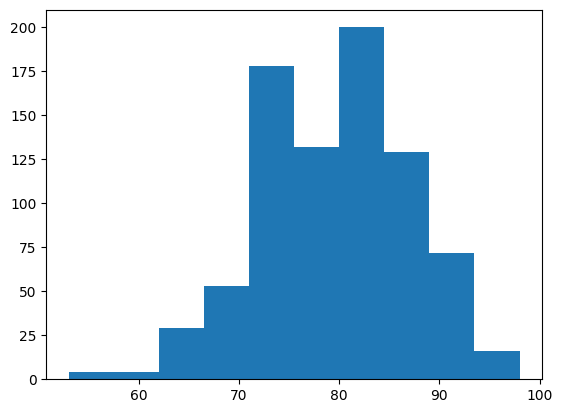

In [ ]:
plt.hist(df.Spec_score)

(array([  9.,  96., 100.,  47., 104., 117.,  44., 110., 104.,  86.]),
 array([3.9  , 3.985, 4.07 , 4.155, 4.24 , 4.325, 4.41 , 4.495, 4.58 ,
        4.665, 4.75 ]),
 <BarContainer object of 10 artists>)

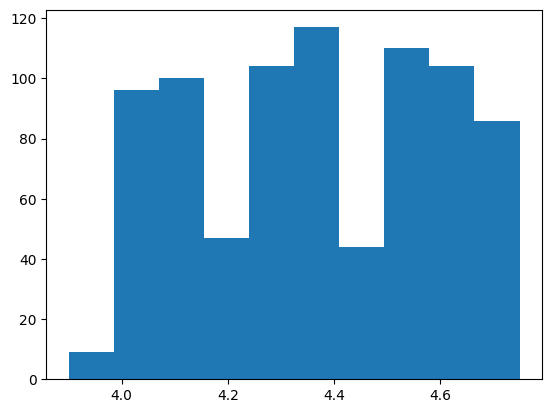

In [ ]:
plt.hist(df.Rating)

<Axes: >

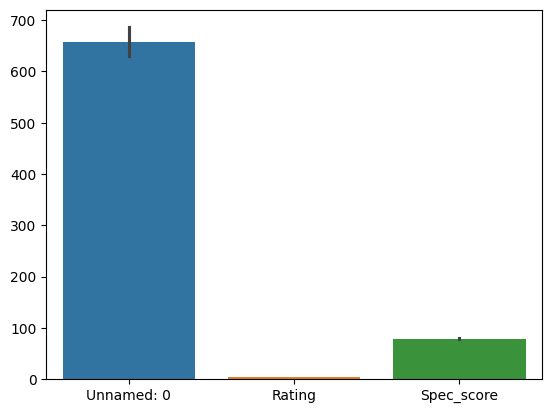

In [ ]:
sns.barplot(df)

In [ ]:
X=df.Spec_score

In [ ]:
y=df['Price'].str.replace(",","").astype(int)

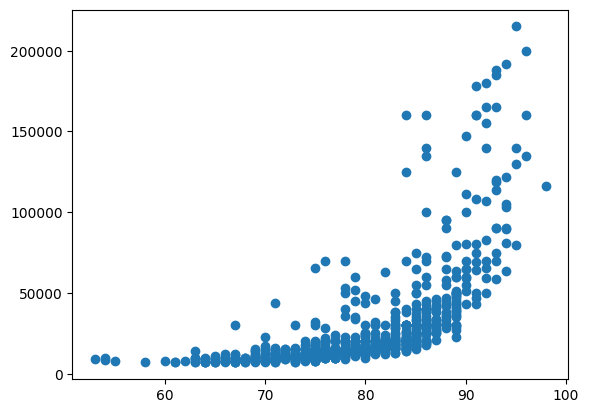

In [ ]:
plt.scatter(X,y)

In [ ]:
X=np.reshape(X,(-1,1))
y=np.reshape(y,(-1,1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=2)

In [ ]:
l=LinearRegression()

In [ ]:
l.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=l.predict(X_test)

In [ ]:
print("MSE=",mean_squared_error(y_pred,y_test))

MSE= 603927775.954708


In [ ]:
print("MAE=",mean_absolute_error(y_pred,y_test))

MAE= 15285.3648049863


In [ ]:
print("r2 score=",r2_score(y_pred,y_test))

r2 score= -0.7697254299986533


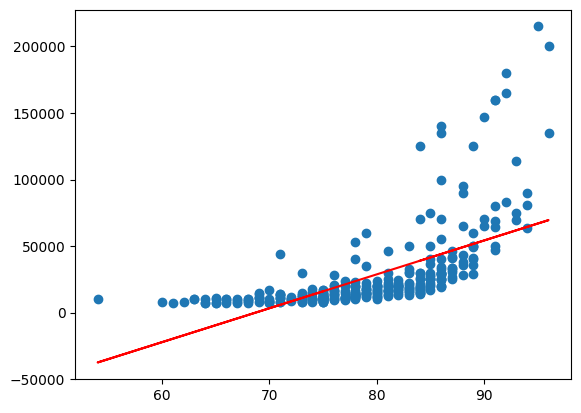

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,"r")